# Retrieving meaningful dimensions using AABCC score

We find that AABCC score and correlation rank overlap only for the top ~50 dimensions. The overall distributions of values are also similar.

## 1. Gender  
In this Notebook, we will implement and use a new metric to measure the meaningfulness of a WE dimension for a classification task.

In [2]:
import pandas as pd
df_n = pd.read_csv("../Data/all_nouns_we.csv")
df_n["gender"] = df_n["gender"].apply(lambda x:"F" if x=="feminine" else "M") 
df_n.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,504,505,506,507,508,509,510,511,gn,gender
0,abaisse,4.652041,-4.028067,0.883202,4.782082,-2.294611,-3.894453,-0.810279,-0.713933,4.819906,...,-1.768522,0.557448,-1.204734,-5.865204,-7.542219,-4.662949,-0.546076,-1.836027,singular,F
1,abandonnée,3.936752,1.365095,0.601899,-3.841945,0.137241,-6.720108,-4.014627,-0.164519,-4.163124,...,-1.122231,-4.691674,-1.861967,-7.399371,-3.871466,-4.995701,4.840463,-0.697731,singular,F
2,abattue,5.501807,0.974496,1.963397,-0.096684,-0.317693,-5.214660,-1.325345,1.782016,2.419068,...,-1.418699,-2.060775,-4.221079,-9.340311,-6.799405,-3.366512,-1.183914,-0.273903,singular,F
3,abbaye,4.343249,-4.697087,1.981792,0.167565,4.937754,-5.705141,-4.314447,-2.714383,-1.888555,...,4.184031,3.421206,-1.783199,-6.933277,-5.636909,3.233929,-3.364212,-5.757182,singular,F
4,abdominale,4.454150,-0.297545,4.704999,0.880275,0.379564,-3.872901,-2.538447,-7.180586,10.115621,...,-0.737049,-1.824200,-0.034769,-2.647907,-4.493944,-0.005413,4.762722,-5.029149,singular,F


### 1.1 Test on 1 column

In [3]:
df_n.sort_values("0")[["0", "gender"]]

,0,gender
2522,-7.234042,F
12489,-6.904568,M
11048,-6.609836,M
5652,-6.572830,F
4652,-6.460532,F
...,...,...
1571,12.605267,F
1598,12.682314,F
11169,13.303518,M
2926,13.810582,F


In [4]:
def get_sequence(df:pd.DataFrame, dim:int, feature:str):
    return list(df.sort_values(str(dim))[feature])

def get_score_for_sequence(seq:list):
    
    # initialisation
    score = 0
    i = 0 # current index
    val = seq[0] # current value

    while i < len(seq):
        j = 0 # consecutive values counter

        while i < len(seq) and seq[i] == val:
            j += 1
            i += 1
        
        score += sum([i for i in range(j+1)])
        
        if i < len(seq):
             val = seq[i]

    return score


In [5]:
seq = list("aabbbabab") # should be 3 + 6 + 1 + 1 + 1 + 1 = 13
get_score_for_sequence(seq)

13

### 1.2 Generalisation to all the columns

In [6]:
d = {}
for i in range(512):
    seq = get_sequence(df_n, i, "gender")
    d[i] = get_score_for_sequence(seq)

Printing the top dimensions (having the highest scores)

In [7]:
sorted_ = sorted(d.items(), key = lambda x:x[1], reverse=True) # sorting the dimensions by score
sorted_

[(100, 29081),
 (192, 28850),
 (403, 28665),
 (245, 28646),
 (377, 28625),
 (316, 28456),
 (195, 28382),
 (121, 28331),
 (507, 28139),
 (202, 28125),
 (117, 28112),
 (28, 28084),
 (74, 27987),
 (239, 27978),
 (310, 27942),
 (470, 27937),
 (362, 27926),
 (318, 27855),
 (274, 27842),
 (434, 27823),
 (477, 27804),
 (472, 27802),
 (443, 27769),
 (40, 27749),
 (306, 27732),
 (487, 27701),
 (237, 27683),
 (461, 27656),
 (256, 27655),
 (59, 27642),
 (389, 27632),
 (193, 27565),
 (326, 27558),
 (188, 27539),
 (455, 27523),
 (421, 27522),
 (439, 27521),
 (510, 27515),
 (55, 27503),
 (198, 27494),
 (296, 27490),
 (20, 27474),
 (474, 27459),
 (508, 27458),
 (207, 27455),
 (292, 27454),
 (41, 27438),
 (49, 27430),
 (321, 27426),
 (29, 27425),
 (119, 27423),
 (215, 27417),
 (174, 27414),
 (21, 27412),
 (179, 27410),
 (250, 27409),
 (374, 27395),
 (162, 27392),
 (176, 27392),
 (312, 27390),
 (276, 27387),
 (144, 27381),
 (51, 27379),
 (268, 27351),
 (6, 27348),
 (39, 27347),
 (432, 27336),
 (7, 2732

Comparing this sorting with the dimensions that have the highest correlation with gender information.

In [8]:
# Encoding gender as 1 (F) and 0 (M)
df_n["gender-01"] = df_n["gender"].apply(lambda x:1 if x=="F" else 0)

# Get the correlation between dimensions and the gender-01
import numpy as np
gender_corr_df = pd.DataFrame(columns=["dimension", "correlation_with_gender"])
gender_list = []

for i in range(512):
    gender_list.append(df_n.loc[:,[str(i), 'gender-01']].corr().iloc[0][-1])

gender_corr_df["dimension"] = range(512)
gender_corr_df["correlation_with_gender"] = gender_list
gender_corr_df["sign"] = np.sign(gender_corr_df["correlation_with_gender"])
gender_corr_df["abs"] = abs(gender_corr_df["correlation_with_gender"])

In [9]:
# sort by absolute value of correlation 
gender_corr_df = gender_corr_df.sort_values("abs", ascending=False)
gender_corr_df["corr-rank"] = gender_corr_df["abs"].rank(ascending=False)
gender_corr_df["aabcc"] = gender_corr_df["dimension"].apply(lambda x:d[x])
gender_corr_df["aabcc-rank"] = gender_corr_df["aabcc"].rank(ascending=False)
gender_corr_df

,dimension,correlation_with_gender,sign,abs,corr-rank,aabcc,aabcc-rank
100,100,0.201022,1.0,0.201022,1.0,29081,1.0
195,195,0.198300,1.0,0.198300,2.0,28382,7.0
316,316,-0.192950,-1.0,0.192950,3.0,28456,6.0
245,245,-0.181808,-1.0,0.181808,4.0,28646,4.0
507,507,-0.179582,-1.0,0.179582,5.0,28139,9.0
...,...,...,...,...,...,...,...
401,401,-0.000854,-1.0,0.000854,508.0,26271,478.0
67,67,0.000692,1.0,0.000692,509.0,26959,185.5
35,35,0.000605,1.0,0.000605,510.0,26838,242.5
272,272,-0.000249,-1.0,0.000249,511.0,26827,247.0


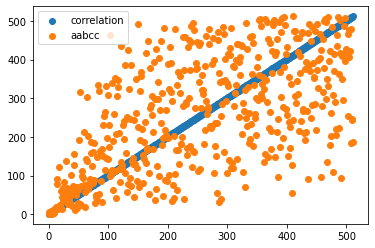

In [10]:
from matplotlib import pyplot as plt

plt.scatter(range(512), gender_corr_df["corr-rank"], label="correlation")
plt.scatter(range(512), gender_corr_df["aabcc-rank"], label="aabcc")
plt.legend()
plt.show()

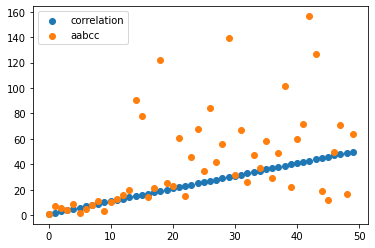

In [11]:
# For the 50 first dimensions only 
plt.scatter(range(50), list(gender_corr_df["corr-rank"])[:50], label="correlation")
plt.scatter(range(50), list(gender_corr_df["aabcc-rank"])[:50], label="aabcc")
plt.legend()
plt.show()

## 2. Number

In [12]:
df_n["nb"] = df_n["gn"]
df_n.drop(columns=["gn"], inplace=True)
df_n["nb-01"] = df_n["nb"].apply(lambda x:1 if x=="plural" else 0)

In [13]:
d = {}
for i in range(512):
    seq = get_sequence(df_n, i, "nb")
    d[i] = get_score_for_sequence(seq)

sorted_ = sorted(d.items(), key = lambda x:x[1], reverse=True) # sorting the dimensions by score
sorted_

[(310, 60625),
 (54, 46034),
 (288, 42679),
 (285, 42037),
 (278, 40910),
 (384, 40555),
 (81, 40216),
 (25, 39039),
 (250, 38996),
 (172, 38891),
 (359, 38843),
 (289, 37102),
 (243, 36773),
 (507, 36715),
 (200, 36432),
 (495, 36411),
 (182, 36323),
 (5, 36240),
 (309, 36161),
 (296, 36092),
 (360, 36013),
 (369, 35988),
 (158, 35980),
 (430, 35895),
 (57, 35870),
 (117, 35778),
 (274, 35751),
 (420, 35703),
 (56, 35625),
 (67, 35611),
 (3, 35544),
 (208, 35527),
 (311, 35473),
 (84, 35445),
 (8, 35328),
 (129, 35226),
 (175, 35146),
 (160, 35069),
 (83, 35030),
 (328, 34983),
 (487, 34957),
 (204, 34943),
 (461, 34898),
 (362, 34870),
 (303, 34857),
 (374, 34832),
 (167, 34788),
 (246, 34787),
 (455, 34756),
 (136, 34746),
 (297, 34727),
 (205, 34620),
 (194, 34554),
 (281, 34500),
 (105, 34469),
 (257, 34397),
 (183, 34332),
 (229, 34290),
 (511, 34270),
 (451, 34228),
 (419, 34218),
 (219, 34209),
 (381, 34206),
 (485, 34186),
 (185, 34161),
 (337, 34155),
 (377, 34145),
 (213, 34

In [14]:
import numpy as np
nb_corr_df = pd.DataFrame(columns=["dimension", "correlation_with_nb"])
nb_list = []

for i in range(512):
    nb_list.append(df_n.loc[:,[str(i), 'nb-01']].corr().iloc[0][-1])

nb_corr_df["dimension"] = range(512)
nb_corr_df["correlation_with_nb"] = nb_list
nb_corr_df["sign"] = np.sign(nb_corr_df["correlation_with_nb"])
nb_corr_df["abs"] = abs(nb_corr_df["correlation_with_nb"])
nb_corr_df = nb_corr_df.sort_values("abs", ascending=False)
nb_corr_df["corr-rank"] = nb_corr_df["abs"].rank(ascending=False)
nb_corr_df["aabcc"] = nb_corr_df["dimension"].apply(lambda x:d[x])
nb_corr_df["aabcc-rank"] = nb_corr_df["aabcc"].rank(ascending=False)
nb_corr_df

,dimension,correlation_with_nb,sign,abs,corr-rank,aabcc,aabcc-rank
310,310,-0.415214,-1.0,0.415214,1.0,60625,1.0
54,54,-0.335934,-1.0,0.335934,2.0,46034,2.0
285,285,-0.302499,-1.0,0.302499,3.0,42037,4.0
278,278,0.298213,1.0,0.298213,4.0,40910,5.0
288,288,0.294037,1.0,0.294037,5.0,42679,3.0
...,...,...,...,...,...,...,...
275,275,0.001004,1.0,0.001004,508.0,31675,442.0
70,70,-0.000549,-1.0,0.000549,509.0,31720,428.0
388,388,-0.000479,-1.0,0.000479,510.0,31715,430.5
100,100,-0.000360,-1.0,0.000360,511.0,32601,227.5


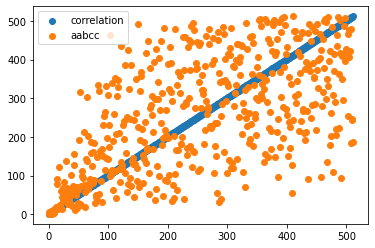

In [15]:
from matplotlib import pyplot as plt

plt.scatter(range(512), gender_corr_df["corr-rank"], label="correlation")
plt.scatter(range(512), gender_corr_df["aabcc-rank"], label="aabcc")
plt.legend()
plt.show()

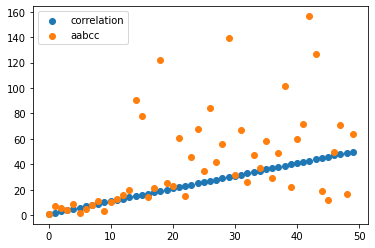

In [16]:
# For the 50 first dimensions only 
plt.scatter(range(50), list(gender_corr_df["corr-rank"])[:50], label="correlation")
plt.scatter(range(50), list(gender_corr_df["aabcc-rank"])[:50], label="aabcc")
plt.legend()
plt.show()

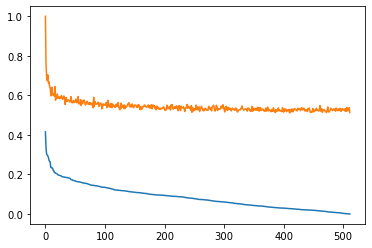

In [17]:
plt.plot(list(abs(nb_corr_df["correlation_with_nb"])), label="correlation")
max_aabcc = max(list(nb_corr_df["aabcc"]))
plt.plot(list(nb_corr_df["aabcc"]/max_aabcc), label="aabcc")

# 3. PoS

In [18]:
all_n_we = pd.read_csv('../Data/all_nouns_we.csv', index_col=0)
all_nouns_with_freq = pd.read_csv('../Data/freq_NOUN.csv', index_col='Word')
all_n_we_with_freq = all_n_we.merge(all_nouns_with_freq, left_index=True, right_index=True).sort_values(by='freq', ascending=False)

all_v_we = pd.read_csv('../Data/all_verb_we.csv', index_col=0)
all_verbs_with_freq = pd.read_csv('../Data/freq_VERB.csv', index_col='Word')
all_v_we_with_freq = all_v_we.merge(all_verbs_with_freq, left_index=True, right_index=True).sort_values(by='freq', ascending=False)

unique_nouns = all_n_we_with_freq[~all_n_we_with_freq.index.isin(all_v_we_with_freq.index)]
unique_nouns['pos'] = 0

unique_verbs = all_v_we_with_freq[~all_v_we_with_freq.index.isin(all_n_we_with_freq.index)]
unique_verbs['pos'] = 1

unique_n_v = pd.concat([unique_nouns.iloc[:1000], unique_verbs.iloc[:1000]])
unique_n_v

<ipython-input-18-77c320199aec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_nouns['pos'] = 0
<ipython-input-18-77c320199aec>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_verbs['pos'] = 1


,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,gn,gender,lemme,cgram,freq,pos
chose,0.657807,1.650356,2.463752,-4.890357,-0.208469,-5.273172,-2.022167,3.938069,-1.886973,0.658918,...,0.059850,-4.353068,-1.477708,-6.344492,singular,feminine,chose,NOM,1321.79,0
vie,0.728105,-3.619239,6.010180,-3.412671,4.317724,-2.456576,-3.586677,1.279530,0.782081,-1.396616,...,-2.438175,-2.297100,-0.613292,1.389376,singular,feminine,vie,NOM,986.59,0
fois,0.930591,0.391257,-0.526626,1.497111,-1.076748,2.202879,-1.588476,-0.458471,-1.804767,-0.920485,...,-2.843595,-0.272411,6.411278,3.698102,plural,feminine,fois,NOM,899.25,0
père,-1.093649,-2.799815,-2.701471,0.991694,-0.667527,-5.704983,-1.606111,-3.485601,-2.109801,-1.120821,...,-2.552399,-2.937020,-3.374631,-5.006559,singular,masculine,père,NOM,879.31,0
dieu,0.198962,-0.553110,-2.546090,-1.606250,1.540941,-1.225879,1.944866,-0.366766,1.950244,2.274500,...,-2.373324,-6.390708,0.005803,-5.595995,singular,masculine,dieu,NOM,852.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
menacé,2.943579,-3.132725,5.258647,-2.670896,0.782504,-0.254785,-1.707036,-2.181647,-0.539423,-0.697134,...,-3.696120,-5.162034,1.922858,0.151231,NaN,NaN,menacer,VER,14.44,1
abattre,1.831471,0.906042,-1.346421,-2.178033,-1.647874,-4.480566,-2.788281,-2.075789,2.570961,-0.989937,...,-5.390528,-3.662323,-1.486962,-4.619687,NaN,NaN,abattre,VER,14.43,1
servent,4.535331,-1.742471,1.859661,-4.640862,0.967597,0.544997,1.386421,2.190150,2.120933,-1.334705,...,-7.028819,-5.569311,0.558659,-1.842434,NaN,NaN,servir,VER,14.43,1
arrêtera,0.041803,-2.553360,-5.852127,-1.257409,-1.878123,-0.519221,-3.765210,1.771526,3.590101,-0.008251,...,-5.176277,-6.772570,0.907678,-5.247745,NaN,NaN,arrêter,VER,14.42,1


In [20]:
d = {}
for i in range(512):
    seq = get_sequence(unique_n_v, i, "pos")
    d[i] = get_score_for_sequence(seq)

In [21]:
sorted_ = sorted(d.items(), key = lambda x:x[1], reverse=True) # sorting the dimensions by score
sorted_[:10]

[(480, 17855),
 (159, 12798),
 (462, 9543),
 (401, 8680),
 (192, 8675),
 (282, 8240),
 (198, 8096),
 (341, 7675),
 (29, 7586),
 (458, 7429)]

In [22]:
pos_corr_df = pd.DataFrame(columns=["dimension", "correlation_with_pos"])
pos_list = []

for i in range(512):
    pos_list.append(unique_n_v.loc[:,[str(i), 'pos']].corr().iloc[0][-1])

pos_corr_df["dimension"] = range(512)
pos_corr_df["correlation_with_pos"] = pos_list
pos_corr_df["sign"] = np.sign(pos_corr_df["correlation_with_pos"])
pos_corr_df["abs"] = abs(pos_corr_df["correlation_with_pos"])


# sort by absolute value of correlation 
pos_corr_df = pos_corr_df.sort_values("abs", ascending=False)
pos_corr_df["corr-rank"] = pos_corr_df["abs"].rank(ascending=False)
pos_corr_df["aabcc"] = pos_corr_df["dimension"].apply(lambda x:d[x])
pos_corr_df["aabcc-rank"] = pos_corr_df["aabcc"].rank(ascending=False)
pos_corr_df

,dimension,correlation_with_pos,sign,abs,corr-rank,aabcc,aabcc-rank
480,480,-0.570284,-1.0,0.570284,1.0,17855,1.0
462,462,-0.568216,-1.0,0.568216,2.0,9543,3.0
159,159,0.531525,1.0,0.531525,3.0,12798,2.0
198,198,-0.501122,-1.0,0.501122,4.0,8096,7.0
282,282,-0.495796,-1.0,0.495796,5.0,8240,6.0
...,...,...,...,...,...,...,...
385,385,-0.001940,-1.0,0.001940,508.0,4032,423.0
474,474,-0.001640,-1.0,0.001640,509.0,4067,397.5
408,408,0.001038,1.0,0.001038,510.0,3751,511.0
47,47,0.000407,1.0,0.000407,511.0,4101,362.5


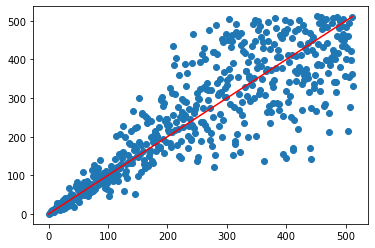

In [28]:
plt.scatter(pos_corr_df["corr-rank"], pos_corr_df["aabcc-rank"])
plt.plot(range(512), range(512), 'red')

plt.show()

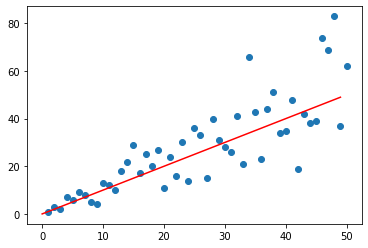

In [27]:
# For the 50 first dimensions only 
plt.scatter(pos_corr_df["corr-rank"][:50], pos_corr_df["aabcc-rank"][:50])
plt.plot(range(50), range(50), 'red')
plt.show()